<a href="https://colab.research.google.com/github/hyemworks/make-your-firstGAN-with-pytorch/blob/main/ch06_1010_pattern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CHAPTER 06 &nbsp;&nbsp;&nbsp;&nbsp;1010 Pattern**

Ïù¥ÎØ∏ÏßÄÎ•º ÏÉùÏÑ±ÌïòÎäî Í≤ÉÎ≥¥Îã§ Í∞ÑÎã®Ìïú ÏûëÏóÖÏúºÎ°ú Î®ºÏ†Ä "1010 Ìå®ÌÑ¥"ÌòïÏãùÏùò Í∞íÏùÑ ÏÉùÏÑ±Ìï¥ÎÇ¥Îäî GANÏùÑ Íµ¨ÌòÑÌï¥Î≥¥Ïûê!

<br>

**[ Ï≤¥ÌÅ¨Ìï† Í≤É ]**
* GAN ÏΩîÎìúÍ∞Ä ÏùºÎ∞òÏ†ÅÏúºÎ°ú **Ïñ¥ÎñªÍ≤å ÏÉùÍ≤ºÎäîÏßÄ** ÌôïÏù∏
* Ïã†Í≤ΩÎßùÏù¥ **Ïñ¥ÎñªÍ≤å ÌïôÏäµÎêòÎäîÏßÄ** ÌôïÏù∏

## Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞ ÏÜåÏä§


In [33]:
import torch
import torch.nn as nn

import pandas
import matplotlib.pyplot as plt

import numpy

In [34]:
# function to generate real data

import random

def generate_real():
  real_data = torch.FloatTensor(
      [random.uniform(0.8, 1.0),
       random.uniform(0.0, 0.2),
       random.uniform(0.8, 1.0),
       random.uniform(0.0, 0.2)])
  return real_data

generate_real()

tensor([0.9608, 0.0919, 0.8617, 0.1352])

## ÌåêÎ≥ÑÍ∏∞ ÎßåÎì§Í∏∞

* ÏûÖÎ†• Î†àÏù¥Ïñ¥ÏóêÏÑú 4Í∞úÏùò ÏûÖÎ†•ÏùÑ Î∞õÎäîÎã§.
* Ï∂úÎ†• Î†àÏù¥Ïñ¥ÏóêÏÑú Ï∞∏Ïù∏ Í≤ΩÏö∞ 1, Í±∞ÏßìÏù∏ Í≤ΩÏö∞ 0ÏùÑ Ï∂úÎ†•ÌïúÎã§.
* ÏùÄÎãâ Î†àÏù¥Ïñ¥ÏóêÎäî ÏÑ∏ Í∞úÏùò ÎÖ∏ÎìúÍ∞Ä ÏÇ¨Ïö©ÎêúÎã§.

In [35]:
class Discriminator(nn.Module):
  
  # Constructor
  def __init__(self):

    # ÌååÏù¥ÌÜ†Ïπò Î∂ÄÎ™® ÌÅ¥ÎûòÏä§ Ï¥àÍ∏∞Ìôî
    super().__init__()

    # Ïã†Í≤ΩÎßù Î†àÏù¥Ïñ¥ Ï†ïÏùò - ÌÜµÍ≥ºÏãúÌÇ¨ Î†àÏù¥Ïñ¥Î•º ÏàúÏÑúÎåÄÎ°ú Í∏∞Ïà†
    self.model = nn.Sequential(
        nn.Linear(4, 3),    # Linear : ÏôÑÏ†ÑÏó∞Í≤∞ Îß§ÌïëÏùÑ ÏùòÎØ∏ => Ïó¨Í∏∞ÏóêÏÑúÎäî ÌõàÎ†® Ïãú ÎÖ∏ÎìúÎ•º ÏóÖÎç∞Ïù¥Ìä∏Ìï† Í∞ÄÏ§ëÏπòÏóê ÎåÄÌïú Ï†ïÎ≥¥ÎèÑ Ìè¨Ìï®ÎêòÏñ¥ ÏûàÏùå
        nn.Sigmoid(),
        nn.Linear(3, 1),    # Linear : ,,
        nn.Sigmoid()
    )

    # Loss Function ÏÑ§Ï†ï
    self.loss_function = nn.MSELoss()

    # Optimizer ÏÑ§Ï†ï
    self.optimizer = torch.optim.SGD(self.parameters(), lr=0.01)

    # ÌõàÎ†® ÏãúÍ∞ÅÌôî (train Ìï®ÏàòÏóêÏÑú ÏÇ¨Ïö©Îê† Î≥ÄÏàò Ï¥àÍ∏∞Ìôî)
    self.counter = 0
    self.progress = []


  # forward function : ÎÑ§Ìä∏ÏõåÌÅ¨Ïóê Ï†ïÎ≥¥ Ï†ÑÎã¨
  def forward(self, inputs):
    # Î™®Îç∏ Ïã§Ìñâ
    return self.model(inputs)



  # train
  def train(self, inputs, targets):
    # inputs  : Ïã†Í≤ΩÎßùÏóê Ï†ÑÎã¨Ìï† ÏûÖÎ†•  
    # targets : ÏõêÌïòÎäî Î™©Ìëú --> Ïù¥Î•º ÌÜµÌï¥ ÏÜêÏã§ÏùÑ Í≥ÑÏÇ∞

    ### Ïã†Í≤ΩÎßù Ï∂úÎ†• Í≥ÑÏÇ∞
    outputs = self.forward(inputs)  # train Ìï®ÏàòÏóêÏÑú Í∞ÄÏû• Î®ºÏ†Ä Ìï¥ÏïºÌï† Ïùº! == forward()Î°ú ÏûÖÎ†•Í∞íÏùÑ Ïã†Í≤ΩÎßùÏóê Ï†ÑÎã¨ÌïòÏó¨ Í≤∞Í≥ºÎ•º ÏñªÏñ¥ÎÇ¥Îäî Í≤É
    
    ### ÏÜêÏã§ Í≥ÑÏÇ∞
    loss = self.loss_function(outputs, targets)
    #  Í≥ÑÏÇ∞ Í∑∏ÎûòÌîÑÏùò ÎßàÏßÄÎßâ ÎÖ∏ÎìúÎäî ÏÜêÏã§Ìï®Ïàò!
    #   => ÏÜêÏã§ Í≥ÑÏÇ∞ÏùÑ ÏúÑÌï¥ Í∞Å ÎÖ∏ÎìúÏóêÏÑú Í∏∞Ïö∏Í∏∞Í∞Ä Î≥ÄÌïòÎäî Í≤ÉÏùÄ Í∞Å ÌïôÏäµ ÌååÎùºÎØ∏ÌÑ∞Í∞Ä Î≥ÄÌï† ÎïåÎßàÎã§ ÏÜêÏã§Ïù¥ Î≥ÄÌïòÎäî Í≤ÉÍ≥º Í∞ôÏùå
    

    ### ÌõàÎ†® ÏãúÍ∞ÅÌôî (Î™®ÎãàÌÑ∞ÎßÅ)
    # Ïπ¥Ïö¥ÌÑ∞Î•º Ï¶ùÍ∞ÄÏãúÌÇ§Í≥† 10ÌöåÎßàÎã§ Ïò§Ï∞® Ï†ÄÏû•
    self.counter += 1
    if (self.counter % 10 == 0):
        self.progress.append(loss.item()) # item() : ÌÖêÏÑúÏóêÏÑú Í∞íÏùÑ Í∫ºÎÇ¥Ïò§Îäî Ìï®Ïàò
    if (self.counter % 10000 == 0):
        print("counter = ", self.counter)


    ### ÏÜêÏã§ÏùÑ ÏÇ¨Ïö©Ìï¥ ÎÑ§Ìä∏ÏõåÌÅ¨Ïùò Í∞ÄÏ§ëÏπòÎ•º ÏóÖÎç∞Ïù¥Ìä∏
    # Í∏∞Ïö∏Í∏∞ Ï¥àÍ∏∞Ìôî
    self.optimizer.zero_grad()  # Í≥ÑÏÇ∞ Í∑∏ÎûòÌîÑÏùò Í∏∞Ïö∏Í∏∞Í∞Ä Î™®Îëê 0ÏúºÎ°ú Ï¥àÍ∏∞Ìôî
                                #   : Ïã†Í≤ΩÎßùÏùÑ ÌõàÎ†®Ìï† ÎïåÎßàÎã§ Îß§Î≤à Í∏∞Ïö∏Í∏∞Îäî 0ÏúºÎ°ú ÏÑ§Ï†ïÎêòÏñ¥ ÏûàÏñ¥Ïïº Ìï®
                                #      => Í∑∏Î†áÍ≤å ÌïòÏßÄ ÏïäÏúºÎ©¥ loss.backward()Î•º Îî∞Îùº Í≥ÑÏÇ∞ÎßàÎã§ ÏåìÏù¥Í≤å Îê®
    # Ïó≠Ï†ÑÌåå Ïã§Ìñâ
    loss.backward()
    # Í∞ÄÏ§ëÏπò Í∞±Ïã†
    self.optimizer.step()



  def plot_progress(self):
    df = pandas.DataFrame(self.progress, columns=['loss'])
    df.plot(ylim=(0, 1.0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))
  

## ÌåêÎ≥ÑÍ∏∞ ÌÖåÏä§Ìä∏ÌïòÍ∏∞

ÌòÑÏû¨Îäî ÏïÑÏßÅ ÏÉùÏÑ±Í∏∞Î•º ÎßåÎì§Í∏∞ Ï†ÑÏù¥Í∏∞ ÎïåÎ¨∏Ïóê,<br>
ÌåêÎ≥ÑÍ∏∞Í∞Ä ÏÉùÏÑ±Í∏∞ÏôÄ Ï†úÎåÄÎ°ú Í≤ΩÏüÅÌïòÎäîÏßÄ ÏßÑÏßú ÌÖåÏä§Ìä∏ÌïòÍ∏∞Í∞Ä Ïñ¥Î†§ÏõÄ.<br>
‚û° ÌåêÎ≥ÑÍ∏∞Í∞Ä ÏûÑÏùòÏùò Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïòÏó¨ **Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞Î•º Íµ¨Î≥ÑÌï¥ÎÇº Ï†ïÎèÑÏùò ÏÑ±Îä•ÏùÑ Í∞ÄÏ°åÎäêÎÉê**Î•º ÌôïÏù∏Ìï† Ïàò ÏûàÏùå.

In [4]:
def generate_random(size):
  random_data = torch.rand(size)  # 0Í≥º 1ÏÇ¨Ïù¥Ïùò sizeÍ∞úÏùò Í∞íÏùÑ Í∞ÄÏßÑ ÌÖêÏÑúÎ•º Î∞òÌôò
  return random_data

Ïù¥Ï†ú Ï†úÎåÄÎ°ú Î∂ÑÎ•òÌïòÎ©¥ Î≥¥ÏÉÅÏùÑ Î∞õÎäî ÌõàÎ†®Í≥ºÏ†ïÏúºÎ°ú ÌåêÎ≥ÑÍ∏∞Î•º ÌõàÎ†®Ìï¥Î≥¥Ïûê.

* 1010 Ìå®ÌÑ¥ Îç∞Ïù¥ÌÑ∞Îäî ÏßÑÏßúÏù¥ÎØÄÎ°ú Î™©ÌëúÏ∂úÎ†•ÏùÄ 1.0ÏúºÎ°ú
* ÏûÑÏùòÏùò ÎÖ∏Ïù¥Ï¶à Îç∞Ïù¥ÌÑ∞Îäî Í∞ÄÏßúÏù¥ÎØÄÎ°ú Î™©ÌëúÏ∂úÎ†•ÏùÄ 0.0ÏúºÎ°ú

In [6]:
D=Discriminator()

for i in range(10000):
  # real data
  D.train(generate_real(), torch.FloatTensor([1.0]))
  # fake data
  D.train(generate_random(4), torch.FloatTensor([0.0]))

counter =  10000
counter =  20000


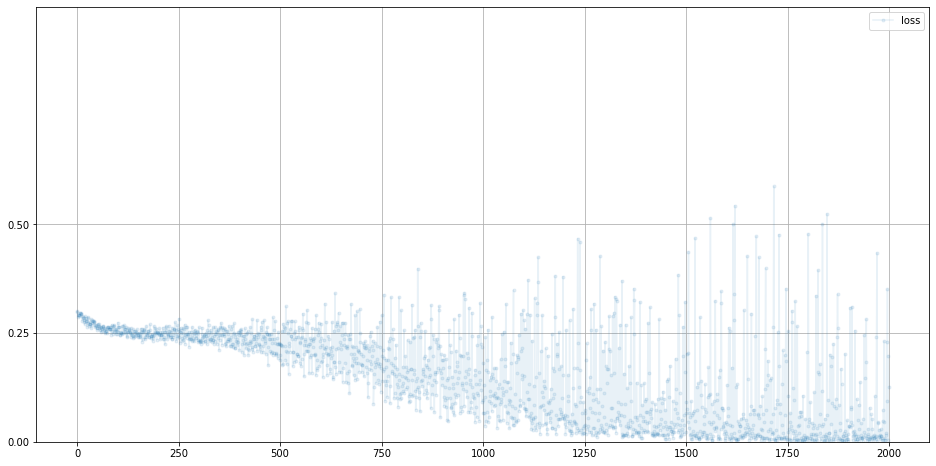

In [7]:
# plot discriminator loss

D.plot_progress()

In [19]:
# manually run discriminator to check it can tell real data from fake

test_real = generate_real()
test_fake = generate_random(4)

print( test_real )
print( D.forward(test_real) )
print( D.forward(test_real).item() )

print()

print( test_fake )
print( D.forward(test_fake) )
print( D.forward(test_fake).item() )

tensor([0.9142, 0.1556, 0.8414, 0.0021])
tensor([0.8239], grad_fn=<SigmoidBackward0>)
0.8239241242408752

tensor([0.5019, 0.9176, 0.3230, 0.2544])
tensor([0.0788], grad_fn=<SigmoidBackward0>)
0.07883457839488983


> ü¶ã **TORCH.TENSOR.ITEM**<br>
Returns the value of this tensor as a standard Python number.<br>
This only works for tensors with one element.

## ÏÉùÏÑ±Í∏∞ ÎßåÎì§Í∏∞

ÏÉùÏÑ±Í∏∞Îäî Îã®ÏàúÌûà Ìï®ÏàòÍ∞Ä ÏïÑÎãàÎùº **ÌõàÎ†®**ÏùÑ ÌïÑÏöîÎ°ú ÌïòÎäî Ïã†Í≤ΩÎßù!

In [40]:
class Generator(nn.Module):


  def __init__(self):
    
    # ÌååÏù¥ÌÜ†Ïπò Î∂ÄÎ™®ÌÅ¥ÎûòÏä§ Ï¥àÍ∏∞Ìôî
    super().__init__()

    # Ïã†Í≤ΩÎßù Î†àÏù¥Ïñ¥ Ï†ïÏùò
    self.model = nn.Sequential(
        nn.Linear(1,3),
        nn.Sigmoid(),
        nn.Linear(3,4),
        nn.Sigmoid()
    )

    # ÏòµÌã∞ÎßàÏù¥Ï†Ä ÏÑ§Ï†ï
    self.optimizer = torch.optim.SGD(self.parameters(), lr=0.01)

    # ÏßÑÌñâÏ∏°Ï†ïÏùÑ ÏúÑÌïú Î≥ÄÏàò Ï¥àÍ∏∞Ìôî
    self.counter = 0
    self.progress = []
    self.image_list = []



  def forward(self, inputs):
    
    # Î™®Îç∏ Ïã§Ìñâ
    return self.model(inputs)



  def train(self, D, inputs, targets):

    # Ïã†Í≤ΩÎßù Ï∂úÎ†• Í≥ÑÏÇ∞
    g_output = self.forward(inputs)

    # ÌåêÎ≥ÑÍ∏∞Î°ú Ï†ÑÎã¨
    d_output = D.forward(g_output)

    # Ïò§Ï∞®Í≥ÑÏÇ∞
    loss = D.loss_function(d_output, targets)


    # Ïπ¥Ïö¥ÌÑ∞Î•º Ï¶ùÍ∞ÄÏãúÌÇ§Í≥† 10ÌöåÎßàÎã§ Ïò§Ï∞® Ï†ÄÏû•
    self.counter += 1
    if (self.counter %10 == 0):
      self.progress.append(loss.item())
    
    # Îß§ 1000ÌöåÎßàÎã§ Ïù¥ÎØ∏ÏßÄ Ï†ÄÏû•
    if (self.counter % 1000 == 0):
      self.image_list.append( G.forward(torch.FloatTensor([0.5])).detach().numpy())


    # Í∏∞Ïö∏Í∏∞Î•º Ï¥àÍ∏∞ÌôîÌïòÍ≥† Ïó≠Ï†ÑÌåå ÌõÑ Í∞ÄÏ§ëÏπò Í∞±Ïã†
    self.optimizer.zero_grad()
    loss.backward()
    self.optimizer.step()



  def plot_progress(self):
    df = pandas.DataFrame(self.progress, columns=['loss'])
    df.plot(ylim=(0, 1.0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))


  def plot_images(self):
    # plot images collected during training
    plt.figure(figsize=(16,8))
    plt.imshow(numpy.array(self.image_list).T, interpolation = "None", cmap="Blues")



* ÏÉùÏÑ±Í∏∞ÏóêÎäî ÌåêÎ≥ÑÍ∏∞ÏôÄ Îã¨Î¶¨ <code>self.loss</code>Î•º Ï†ïÏùòÌïòÎäî Î∂ÄÎ∂ÑÏù¥ ÏóÜÎã§
* ÏÉùÏÑ±Í∏∞Îäî ÌåêÎ≥ÑÍ∏∞Î°úÎ∂ÄÌÑ∞ ÌùòÎü¨Ïò® Í∑∏ÎûòÎîîÏñ∏Ìä∏ Ïò§Ï∞®Î•º ÌÜµÌï¥ ÏóÖÎç∞Ïù¥Ìä∏Í∞Ä ÎêúÎã§

## ÏÉùÏÑ±Í∏∞ Í≤∞Í≥º ÌôïÏù∏ÌïòÍ∏∞

In [24]:
# check the generator output

G = Generator()
G.forward(torch.FloatTensor([0.5]))

tensor([0.6407, 0.4598, 0.7788, 0.6116], grad_fn=<SigmoidBackward0>)

## GAN ÌõàÎ†®ÌïòÍ∏∞

In [41]:
%%time

# Create Discriminator and Generator

D = Discriminator()
G = Generator()


# Train Discriminator and Generator

for i in range (10000):
  
  # 01. train dicriminator on "real data"
  D.train(generate_real(), torch.FloatTensor([1.0]))

  # 02. train discriminator on "fake data"
  D.train(G.forward(torch.FloatTensor([0.5])).detach(), torch.FloatTensor([0.0]))
          # use detach() so gradients in G are not calculated

  # 03. train generator
  G.train(D, torch.FloatTensor([0.5]), torch.FloatTensor([1.0]))


counter =  10000
counter =  20000
CPU times: user 17.6 s, sys: 30.5 ms, total: 17.6 s
Wall time: 17.5 s


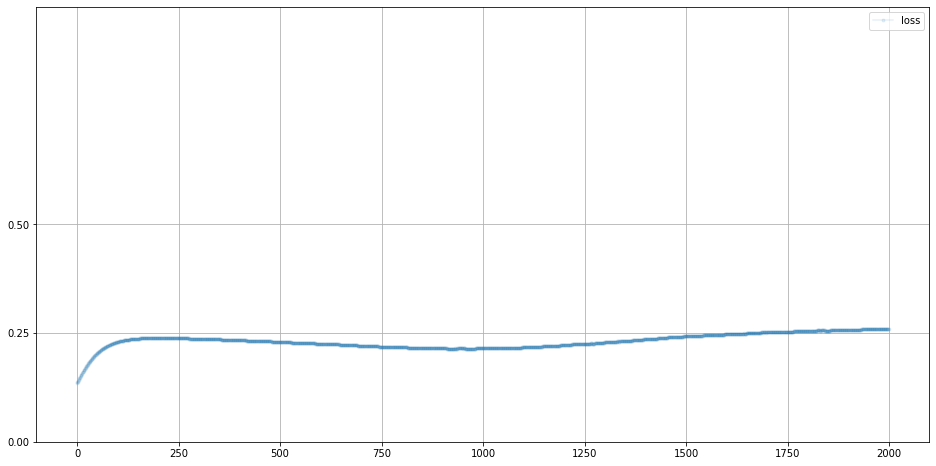

In [42]:
# plot discriminator error

D.plot_progress()

‚Ü™ ÌõàÎ†®Ïùò ÌõÑÎ∞òÎ∂ÄÎ°ú Í∞àÏàòÎ°ù ÏÜêÏã§Ïù¥ 0.25Î°ú Ïò¨ÎùºÍ∞ÄÎäî Ïù¥Ïú† ‚û° **ÏÉùÏÑ±Í∏∞Í∞Ä ÌåêÎ≥ÑÍ∏∞Í∞Ä Íµ¨Î≥ÑÌïòÍ∏∞ ÏâΩÏßÄÏïäÏùÄ Îç∞Ïù¥ÌÑ∞Î•º ÎßåÎì§Ïñ¥ÎÇ¥Í∏∞ ÏãúÏûëÌñàÏùåÏùÑ ÏùòÎØ∏!**

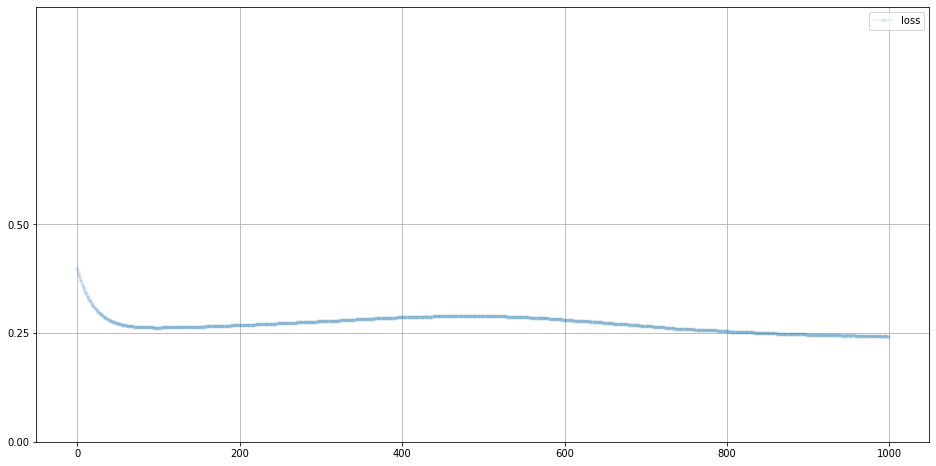

In [43]:
# plot generator error

G.plot_progress()

In [28]:
# manually run generator to see its outputs

G.forward(torch.FloatTensor([0.5]))

tensor([0.9441, 0.0611, 0.9114, 0.0551], grad_fn=<SigmoidBackward0>)

‚Ü™ ÏúÑ Í≤∞Í≥ºÎ•º ÌÜµÌï¥, ÏÉùÏÑ±Í∏∞Í∞Ä 1010Ìå®ÌÑ¥ÏùÑ ÏÉùÏÑ±ÌïòÎèÑÎ°ù Ïûò ÌõàÎ†®ÎêòÏóàÏùåÏùÑ Ïïå Ïàò ÏûàÏùå

<br>
<br>
<br>


##### **[+]**

Ï∂îÍ∞ÄÏ†ÅÏù∏ Ïã§ÌóòÏúºÎ°ú, 1010 Ìå®ÌÑ¥Ïù¥ Ïñ¥Îñ§ ÏãùÏúºÎ°ú ÌõàÎ†®ÏùÑ Í±∞ÏπòÎ©∞ Î≥ÄÌôîÌïòÎäîÏßÄ ÏãúÍ∞ÅÌôîÌï¥Î≥¥Ïûê.



```
# save image every 1000 times

if (i % 1000 == 0):
  image_list.append( G.forward(torch.FloatTensor([0.5])).detach().numpy())
```



‚Ü™ ÏÉùÏÑ±Í∏∞Ïùò Ï∂úÎ†• ÌÖêÏÑúÏóêÏÑú ÎÑòÌååÏù¥ ÌñâÎ†¨Î°ú Í∞íÏùÑ Ï∂îÏ∂úÌïòÍ∏∞ ÏúÑÌï¥ **numpy()** Ìï®Ïàò Ìò∏Ï∂ú Ï†Ñ **detach()** Ìï®ÏàòÎ•º ÌÜµÌï¥ Í≥ÑÏÇ∞ Í∑∏ÎûòÌîÑÎ°úÎ∂ÄÌÑ∞ Í∞íÏùÑ ÎñºÏñ¥ÎÇ¥Îäî Í≥ºÏ†ïÏù¥ ÌïÑÏöî

(Ìï¥ÎãπÎ∂ÄÎ∂ÑÏùÑ generator ÌÅ¥ÎûòÏä§ ÎÇ¥Î∂ÄÏóê ÏÇΩÏûÖ)



```
# plot images collected during training

plt.figure(figsize=(16,8))
plt.imshow(numpy.array(image_list).T, interpolation = "None", cmap="Blues")
```

(Ìï¥ÎãπÎ∂ÄÎ∂Ñ ÎòêÌïú ÏÇΩÏûÖ)


In [51]:
G.image_list

[array([0.5402625 , 0.541809  , 0.60905427, 0.345053  ], dtype=float32),
 array([0.5442577 , 0.5329381 , 0.6272503 , 0.33223814], dtype=float32),
 array([0.55840456, 0.5115966 , 0.6599743 , 0.30899537], dtype=float32),
 array([0.5910023 , 0.46404243, 0.7092    , 0.27215725], dtype=float32),
 array([0.64892775, 0.37652406, 0.76884204, 0.22302853], dtype=float32),
 array([0.7249465 , 0.26408243, 0.82489216, 0.17134632], dtype=float32),
 array([0.79657507, 0.17227837, 0.867427  , 0.12882629], dtype=float32),
 array([0.8493943 , 0.11660812, 0.89648634, 0.09913027], dtype=float32),
 array([0.88474005, 0.08497468, 0.91606593, 0.07939512], dtype=float32),
 array([0.9081745 , 0.06627982, 0.92952776, 0.0661606 ], dtype=float32)]

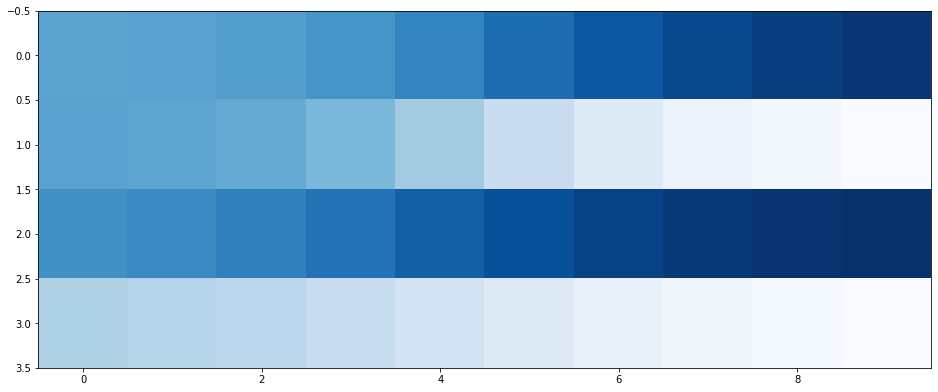

In [45]:
# plot images collected during training

G.plot_images()

---

## **Summary**
> ü¶ã GAN ÌõàÎ†®Î≤ï<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp; (1) Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞ÏÖã ÎØ∏Î¶¨ ÏÇ¥Ìé¥Î≥¥Í∏∞<br>
&nbsp;&nbsp;&nbsp;&nbsp; (2) ÌåêÎ≥ÑÍ∏∞Í∞Ä Ï†ÅÏñ¥ÎèÑ ÏûÑÏùòÏùò ÎÖ∏Ïù¥Ï¶àÏôÄ Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞Î•º Íµ¨Î≥ÑÌïòÎèÑÎ°ù ÌïôÏäµÌï† Ïàò ÏûàÏùÑ ÏÑ±Îä•ÏùÄ ÏßÄÎãàÎäî ÏßÄ ÌôïÏù∏ÌïòÍ∏∞<br>
&nbsp;&nbsp;&nbsp;&nbsp; (3) ÌõàÎ†®ÎêòÏßÄ ÏïäÏùÄ ÏÉùÏÑ±Í∏∞Í∞Ä Ïò¨Î∞îÎ•∏ ÌòïÌÉúÏùò Îç∞Ïù¥ÌÑ∞Î•º ÎßåÎì§Ïñ¥ÎÇ¥ÎäîÏßÄ ÌôïÏù∏ÌïòÍ∏∞<br>
&nbsp;&nbsp;&nbsp;&nbsp; (4) ÏÜêÏã§Ïù¥ Ïñ¥ÎñªÍ≤å Î≥ÄÌïòÎäîÏßÄ **ÏãúÍ∞ÅÌôî**ÌïòÍ∏∞
<br>
<br>

> * Ïûò ÌõàÎ†®Îêú GANÏùÄ ÏÉùÏÑ±Îêú Í∞ÄÏßú Ïù¥ÎØ∏ÏßÄÏôÄ Ïã§Ï†ú Ïù¥ÎØ∏ÏßÄÎ•º Ïûò Íµ¨Î≥ÑÌïòÏßÄ Î™ªÌïòÎäî ÏÉÅÌÉú<br>
Ï¶â, Ï∂úÎ†•ÏùÄ 0.5Î°úÏÑú 0.0Í≥º 1.0Ïùò Ï§ëÍ∞ÑÏóê Ìï¥ÎãπÌïòÎäî Í∞í.<br>
‚Ü™ ÌèâÍ∑†Ï†úÍ≥±Ïò§Ï∞®Ïùò Ïù¥ÏÉÅÏ†ÅÏù∏ Í∞íÏùÄ 0.25
* ÏÉùÏÑ±Í∏∞ÏôÄ ÌåêÎ≥ÑÍ∏∞Î•º Í∞ÅÍ∞Å Îî∞Î°ú ÏãúÍ∞ÅÌôîÌïòÎäî Í≤ÉÏùÄ Ïú†Ïö©Ìï®.
* ÏÉùÏÑ±Í∏∞Ïùò ÏÜêÏã§ÏùÄ ÏÉùÏÑ±Îêú Îç∞Ïù¥ÌÑ∞Î°úÎ∂ÄÌÑ∞ Î∞úÏÉùÌïú ÌåêÎ≥ÑÍ∏∞Ïùò ÏÜêÏã§ÏûÑ.

---